In [ ]:
!pip install causallib==0.9.5

In [2]:
from causallib.datasets import load_nhefs
from causallib.estimation import IPW, PropensityMatching,StratifiedStandardization
from causallib.evaluation import evaluate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
data = load_nhefs()

In [4]:
#傾向スコアを算出するモデルの定義
learner = LogisticRegression(
solver="liblinear", # liblinear: 線形モデル向けの最適化アルゴリズム
class_weight="balanced") # 正例と負例のバランスを取るために使用（第4章で説明）

#傾向スコアの算出とマッチング
pm = PropensityMatching(learner=learner)
pm.fit(data.X, data.a, data.y)

PropensityMatching(caliper=None, covariance_conditioner=EmpiricalCovariance(), estimate_observed_outcome=False, knn_backend=sklearn, matching_mode=both, metric=mahalanobis, n_neighbors=1, propensity_transform=PropensityTransformer(learner=LogisticRegression(class_weight='balanced',
                                                 solver='liblinear')), with_replacement=True,
                   learner=LogisticRegression(class_weight='balanced', solver='liblinear'))

In [5]:
# ATEの計算
outcomes = pm.estimate_population_outcome(data.X, data.a) # 処置群と対照群それぞれの結果変数の平均値を推定
effect = pm.estimate_effect(outcomes[1],outcomes[0])# ATEを推定

#結果の出力
print(f"Average outcome of Untreated: {outcomes[0]:.3f}")
print(f"Average outcome of Treated: {outcomes[1]:.3f}")
print(f'Average Treatment Effect: {effect["diff"]:.3f}')

Average outcome of Untreated: 1.726
Average outcome of Treated: 4.683
Average Treatment Effect: 2.956


In [6]:
#傾向スコアを算出するモデルの定義
learner = LogisticRegression(
solver="liblinear",
class_weight="balanced")

#傾向スコアを算出し、IPWを実施
ipw = IPW(learner = learner)
ipw.fit(data.X, data.a)

# ATEの計算
outcomes = ipw.estimate_population_outcome(data.X, data.a, data.y)
effect = ipw.estimate_effect(outcomes[1], outcomes[0])

#結果の出力
print(f"Average outcome of Untreated: {outcomes[0]:.3f}")
print(f"Average outcome of treated: {outcomes[1]:.3f}")
print(f'Average Treatment Effect: {effect["diff"]:.3f}')

Average outcome of Untreated: 1.563
Average outcome of treated: 4.975
Average Treatment Effect: 3.412


<Axes: xlabel='Absolute Standard Mean Difference', ylabel='Covariates'>

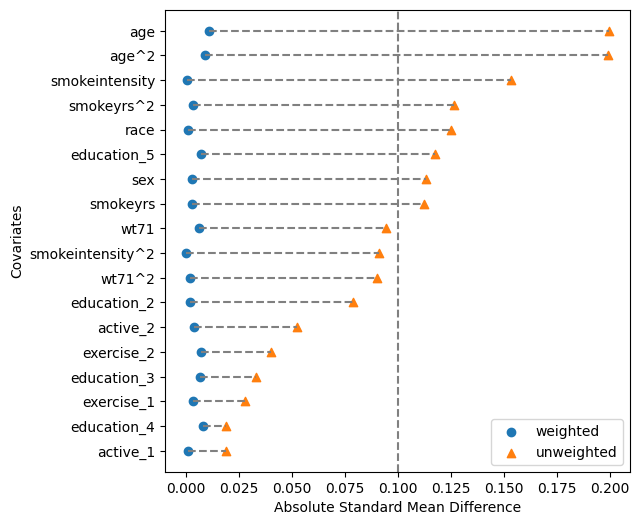

In [7]:
results = evaluate(ipw, data.X, data.a, data.y)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
results.plot_covariate_balance(kind="love", ax=ax, thresh=0.1) #ASMDのカットオフ値(thresh)を0.1に設定

<Axes: title={'center': 'Propensity Distribution'}, xlabel='Propensity', ylabel='Probability density'>

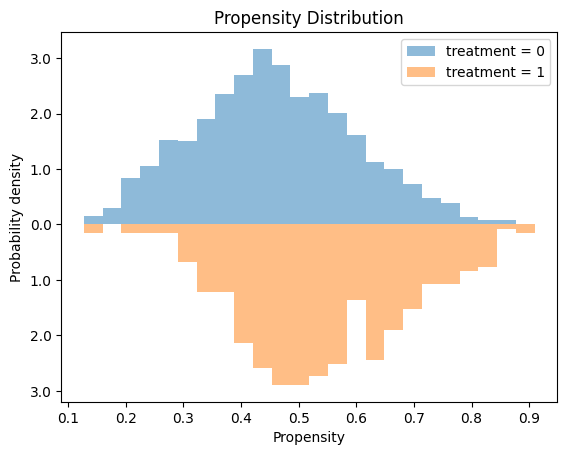

In [8]:
results.plot_weight_distribution()